<a href="https://colab.research.google.com/github/atikaakter/Atika/blob/master/Neural_network_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy
from matplotlib.colors import ListedColormap

epochs: 0.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 1.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 2.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 3.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 4.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 5.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 6.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 7.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 8.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377

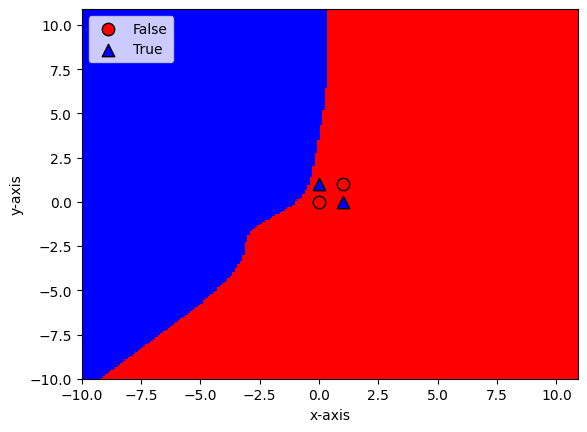

In [2]:
def tanh(x): 
  return (1.0 - numpy.exp(-2*x))/(1.0 + numpy.exp(-2*x))
def tanh_derivative(x):
 return (1 + tanh(x))*(1 - tanh(x))

class NeuralNetwork:
  def __init__(self, net_arch):
      self.activation_func = tanh
      self.activation_derivative = tanh_derivative
      self.layers = len(net_arch)
      self.steps_per_epoch = 1000
      self.net_arch = net_arch
      self.weights = []
      for layer in range(len(net_arch) - 1):
          w = 2 * numpy.random.rand(net_arch[layer] + 1, net_arch[layer + 1]) - 1
          self.weights.append(w)

  def fit(self, data, labels, learning_rate=0.1, epochs=10):
      ones = numpy.ones((1, data.shape[0]))
      Z = numpy.concatenate((ones.T, data), axis=1)
      training = epochs * self.steps_per_epoch
      for k in range(training):
          if k % self.steps_per_epoch == 0:
             print('epochs: {}'.format(k /self.steps_per_epoch))
             for s in data:
                 print(s, nn.predict(s))
      sample = numpy.random.randint(data.shape[0])
      y = [Z[sample]]
      for i in range(len(self.weights) - 1):
          activation = numpy.dot(y[i], self.weights[i])
          activation_f = self.activation_func(activation)
          activation_f = numpy.concatenate((numpy.ones(1),numpy.array(activation_f)))
          y.append(activation_f)

 # last layer
      activation = numpy.dot(y[-1], self.weights[-1])
      activation_f = self.activation_func(activation)
      y.append(activation_f)
 # error for the output layer
      error = labels[sample] - y[-1]
      delta_vec = [error * self.activation_derivative(y[-1])]
 # we need to begin from the back from the next to last layer
      for i in range(self.layers - 2, 0, -1):
          error = delta_vec[-1].dot(self.weights[i][1:].T)
          error = error * self.activation_derivative(y[i][1:])
          delta_vec.append(error)
      delta_vec.reverse()
 # backpropagation
 # 1. Multiply its output delta and input activation to get the gradient of the weight.
 # 2. Subtract a ratio (percentage) of the gradient from the weight
      for i in range(len(self.weights)):
          layer = y[i].reshape(1, nn.net_arch[i] + 1)
          delta = delta_vec[i].reshape(1, nn.net_arch[i + 1])
          self.weights[i] += learning_rate * layer.T.dot(delta)

  def predict(self, x):
      val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))
      for i in range(0, len(self.weights)):
          val = self.activation_func(numpy.dot(val, self.weights[i]))
          val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))
      return val[1]
  
  def plot_decision_regions(self, X, y, points=200):
      markers = ('o', '^')
      colors = ('red', 'blue')
      cmap = ListedColormap(colors)
      x1_min, x1_max = -10, 11
      x2_min, x2_max = -10, 11
 # To produce zoomed-out figures, you can replace thepreceding 2 lines with:
 # x1_min, x1_max = -10, 11
 # x2_min, x2_max = -10, 11
      resolution = max(x1_max - x1_min, x2_max - x2_min) /float(points)
      xx1, xx2 = numpy.meshgrid(numpy.arange(x1_min,x1_max,resolution),numpy.arange(x2_min, x2_max,resolution))
      input = numpy.array([xx1.ravel(), xx2.ravel()]).T
      Z = numpy.empty(0)
      for i in range(input.shape[0]):
          val = nn.predict(numpy.array(input[i]))
          if val < 0.5:
             val = 0
          if val >= 0.5:
             val = 1
          Z = numpy.append(Z, val)
      Z = Z.reshape(xx1.shape)
      plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
      plt.xlim(xx1.min(), xx1.max())
      plt.ylim(xx2.min(), xx2.max())
 # plot all samples
      classes = ["False", "True"]
      for idx, cl in enumerate(numpy.unique(y)):
          plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=1.0,c=colors[idx],edgecolors='black',marker=markers[idx],s=80,label=classes[idx])
      plt.xlabel('x-axis')
      plt.ylabel('y-axis')
      plt.legend(loc='upper left')
      plt.show()

nn = NeuralNetwork([2, 5, 1])
if __name__ == '__main__':
    numpy.random.seed(0)
 # Initialize the NeuralNetwork with 2 input, 2 hidden, and 1 output neurons
    nn = NeuralNetwork([2, 4, 1])
    X = numpy.array([[0, 0],[0, 1],[1, 0],[1, 1]])
    y = numpy.array([0, 1, 1, 0])
    nn.fit(X, y, epochs=10)
    print("Final prediction")
    for s in X:
        print(s, nn.predict(s))
    nn.plot_decision_regions(X, y)